<a href="https://colab.research.google.com/github/KatiaKozlova/stat-project/blob/main/stat_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimental Research in Degree Semantics

Notebook by *Daria Sidorkina* & *Kate Kozlova*

### **Libraries**:

In [4]:
knitr::opts_chunk$set(warning = FALSE, message = FALSE)

In [ ]:
install.packages('rstatix')

In [9]:
library(dplyr)
library(tidyverse)
library(jsonlite)
library(rstatix)

## **Experiment 1**

### **Import of the collected data**:

In [1]:
lion_exp <- read.csv(
    'https://raw.githubusercontent.com/KatiaKozlova/stat-project/refs/heads/main/results/exp1/results_exp1.csv'
    )

### **Data pre-processing and statistics**:

In [ ]:
# omitting the time-stamps and division into 4 groups

lion_exp <- lion_exp[, -c(1:2)]

In [ ]:
# minimal, maximal, average of each sentence
# number and standart deviation

lion_exp_stats <- as.data.frame(t(sapply(
    lion_exp,
    function(x) c(
        avg = mean(x, na.rm = TRUE),
        min = min(x, na.rm = TRUE),
        max = max(x, na.rm = TRUE),
        st_dev = sd(x, na.rm = TRUE),
        count = length(which(!is.na(x)))
        )
        )))

In [ ]:
# adding rownames

lion_exp_stats <- rownames_to_column(lion_exp_stats, var = "stimuli")
lion_exp_stats <- tibble::rowid_to_column(lion_exp_stats, "id")

In [ ]:
# manually omitting fillers (only stimuli are left)

lion_stimuli <- lion_exp_stats[
    -c(1, 3, 6, 10, 11, 18, 19, 20,
    24, 29, 34, 35, 37, 38, 39, 40,
    43, 45, 46, 50, 51, 53, 58, 60,
    62, 65, 68, 69, 72, 76, 78, 80), -1]

rownames(lion_stimuli) <- 1:nrow(lion_stimuli)

In [ ]:
# solving several problems
# (doubled sentence and broken encoding)

mean_ch <- mean(lion_stimuli$avg[c(20, 39)])
sum_ch <- sum(lion_stimuli$count[c(20, 39)])
lion_stimuli$avg[20] <- mean_ch
lion_stimuli$count[20] <- sum_ch
lion_stimuli <- lion_stimuli[-39, ]
rownames(lion_stimuli) <- 1:nrow(lion_stimuli)

lion_stimuli <- lion_stimuli %>%
  mutate(stimuli = str_replace_all(stimuli, "\\.\\.", "\\,\\ ")) %>%
    mutate(stimuli = str_replace_all(stimuli, "\\.", "\\ "))

In [ ]:
# ordering in alphabetical order (groups by four)
# saving as CSV

lion_stimuli_sorted <- lion_stimuli[order(lion_stimuli$stimuli),]

write.csv(lion_stimuli_sorted,"results_exp1_statistics.csv", row.names = FALSE)

### **Data analysis and preliminary findings**:

We took 4 as minimum average score of the sentence to be considered as acceptable (according to the human reasoning).

In [ ]:
lion_stimuli_sorted[lion_stimuli_sorted$avg > 4, ]

,stimuli,avg,min,max,st_dev,count
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19,Вода в ванне немного горячая,4.303030,2,5,0.8472326,33
5,Вода в ванне немного холодная,4.352941,1,5,1.2030858,34
33,Вода в ванне совершенно холодная,4.423077,2,5,0.8566482,26
45,Все студенты в пятой группе немного ленивые,4.647059,2,5,0.7337059,34
14,Интернет в общежитии немного медленный,4.363636,1,5,1.2946569,33
44,Комната Вадика немного тёмная,4.470588,2,5,0.8611231,34
3,Комната Вадика совершенно тёмная,4.264706,1,5,0.9941899,34
41,Лицо на той картине немного уродливое,4.235294,1,5,1.1821609,34
24,Лицо на той картине совершенно уродливое,4.333333,2,5,0.9895285,33


**Our findings**:

Adjectives in bold font represent **prevalence** in acceptability of modification with degree modifiers or the only possible variant of modification.

Three acceptable collocations:
- **грязный** – чистый (dirty – clean, *чистый* with *совершенно* (completely));
- **холодный** – горячий (cold – hot, *горячий* with *немного* (slightly)).

Two acceptable collocations:
- светлый – **тёмный** (light – dark);
- умный – **глупый** (smart – stupid);
- красивый – **уродливый** (beautiful – ugly).

One acceptable collocations (all with *немного* (slightly)):
- быстрый – **медленный** (fast – slow);
- **злой** – добрый (good – bad)$^1$;
- **ленивый** – трудолюбивый (lazy – hard-working);
- храбрый – **трусливый** (brave – fearful).

Zero acceptable collocations:
- щедрый – скупой (generous – stingy);
- высокий – низкий (tall – short);
- тяжёлый – лёгкий (heavy – light).


$^1$ It should be mentioned that we accidentally skiped one variant *совершенно добрый* (completely kind).

## **Experiment 2**

### **Import of the collected data**:

In [153]:
# opening JSON and making a tibble out of it

raw_second_exp <- fromJSON(
    'https://raw.githubusercontent.com/KatiaKozlova/stat-project/refs/heads/main/results/exp2/results_exp2.json',
    flatten=TRUE
    ) %>% as_tibble()

In [154]:
# reframing and transposing into a dataframe

flatten_second_exp <- raw_second_exp %>%
  mutate(across(where(is.list), as.character))

second_exp <- flatten_second_exp[-1] %>%
  t() %>%
    as.data.frame() %>%
      setNames(
        c('id_person', 'id_item',
        'id_list', 'adjective',
        'type', 'judgement',
        'print_time', 'judge_time')
        )

In [155]:
# creating a column with timing of each answer

second_exp$clean_time <- (as.numeric(second_exp$judge_time) - as.numeric(second_exp$print_time)) / 1000

### **Data pre-processing**:

1. First, we want to delete all the people whose answers on control questions were wrong, since they do not pass the adequacy test.
There were three control questions:
        0. Только самый маленький смурф принёс с собой бахилы. ⇝ Самый большой смурф принёс с собой бахилы.
        (Only the smallest Smurf brought shoe covers with him. ⇝ The biggest Smurf brought shoe covers with him.)
        00. Клёпа забыла, что в столовой не принимают карты. ⇝ В столовой не принимают карты.
        (Cleopatra forgot that they don't accept cards in the dining room. ⇝ The dining room does not accept cards.)
        000. В группе нет никого зануднее Андрея. ⇝ Андрей самый занудный в группе.
        (There is no one in the group more nerdy than Andrew. ⇝ Andrew is the most nerdy in the group .)

The answers to them are obviously *False*, *True* and *True*, accordingly. We accepted 4 and 5 as true judgements, and 1 and 2 as false judgements.

In [162]:
# illustations

stimuli <- read.csv(
    'https://raw.githubusercontent.com/KatiaKozlova/stat-project/refs/heads/main/results/exp2/stimuli_exp2.csv',
    colClasses=c("item"="character")
    )

head(stimuli[stimuli$item %in% c('0', '00', '000'), ], 3)

,code,group,item,adj,filler,item_text,item_goal
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1221099,A,0,-,control,Только самый маленький смурф принёс с собой бахилы.,Самый большой смурф принёс с собой бахилы.
2,1221099,A,00,-,control,"Клёпа забыла, что в столовой не принимают карты.",В столовой не принимают карты.
3,1221099,A,000,-,control,В группе нет никого зануднее Андрея.,Андрей самый занудный в группе.


In [163]:
# creating a df with control questions

control_questions <- second_exp[second_exp$type == 'control',]

In [164]:
# spotting unadequate judgments

unadequate_0 <- control_questions[control_questions$id_item == '0' & !(control_questions$judgement %in% c('1', '2')),]$id_person
unadequate_00 <- control_questions[control_questions$id_item == '00' & !(control_questions$judgement %in% c('4', '5')),]$id_person
unadequate_000 <- control_questions[control_questions$id_item == '000' & !(control_questions$judgement %in% c('4', '5')),]$id_person

unadequates <- unique(c(unadequate_0, unadequate_00, unadequate_000))

In [168]:
# deleting these users

second_exp <- second_exp[!(second_exp$id_person %in% unadequates),]

2. Second, among other means, we were also using *Yandex.Toloka*, which allow its' users to get paid for completing easy tasks, such as filling in some questioners. However, one of its' problems include an "unfair game" where subjects may choose answers randomly. Thus, we want to manually detect such users that their timing repeatedly was less than a second per answer and delete them as outliers.

In [166]:
# detecting automatic answers

automatic_answers <- second_exp[second_exp$clean_time < 1,] %>%
  group_by(id_person) %>%
    summarise(n = n())

automatic_answers <- automatic_answers[automatic_answers$n > 1,]

In [170]:
# deleting the only unfair player left

second_exp <- second_exp[!(second_exp$id_person %in% automatic_answers$id_person),]

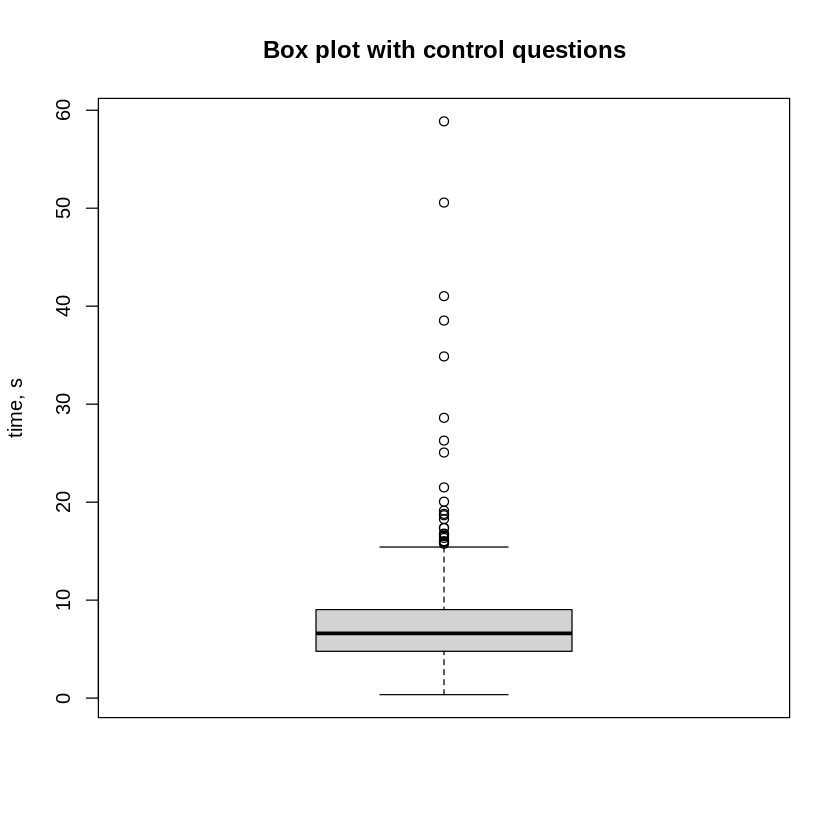

In [172]:
# illustrating via boxplot

boxplot(control_questions$clean_time,
  ylab = "time, s",
  main = 'Box plot with control questions'
)

3. Third, there are still some random unique outliers:
    - time of answer is more than 100s,
    - time of answer is less than 1s.

In [187]:
summary(second_exp$clean_time)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.437    5.657    8.209   13.980   11.691 4155.141 

In [195]:
second_exp <- second_exp[second_exp$clean_time < 100 & second_exp$clean_time > 1,]

### **Calculating the statistics**

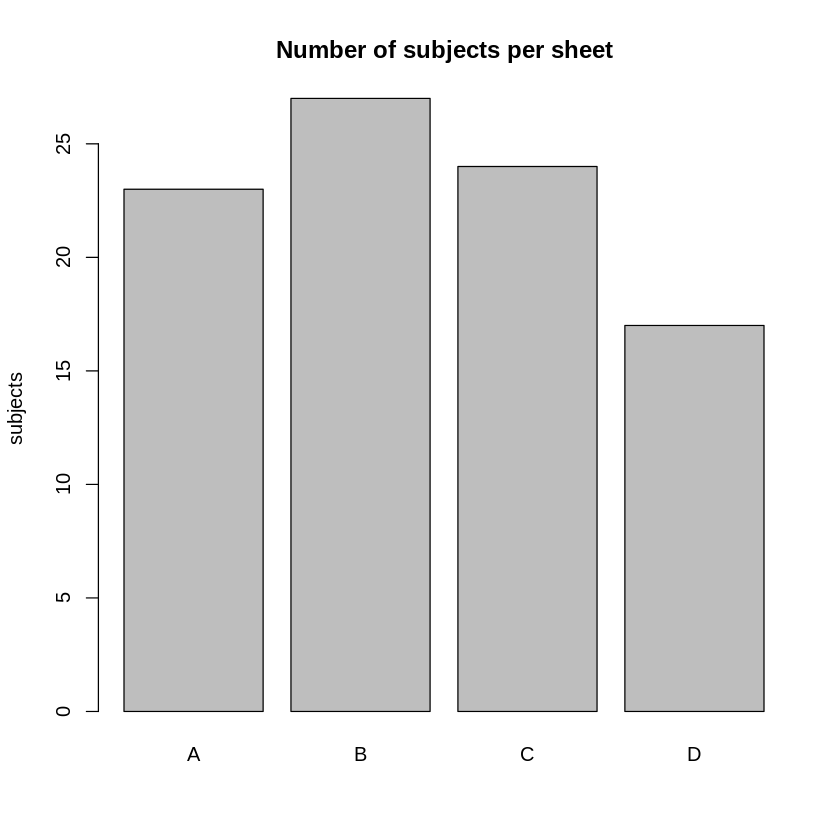

In [236]:
grouped_data <- second_exp %>%
  group_by(id_list) %>%
    summarise(n_people = n_distinct(id_person))

barplot(
    height=pull(grouped_data, n_people),
    names=pull(grouped_data, id_list),
    ylab='subjects',
    main='Number of subjects per sheet'
    )

In [198]:
summary(second_exp$clean_time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.467   5.657   8.202   9.940  11.666  86.977 

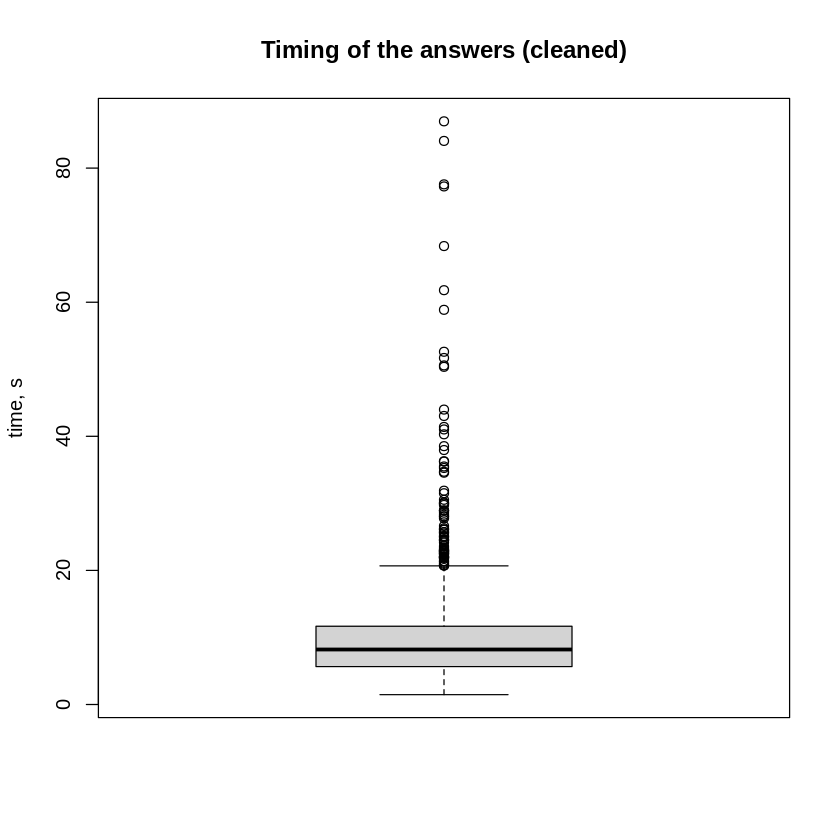

In [237]:
# illustrating via boxplot

boxplot(second_exp$clean_time,
  ylab = "time, s",
  main = 'Timing of the answers (cleaned)'
)